In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression
from sklearn.tree import ExtraTreeRegressor
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('../inputs/data.csv')
df.head()

,0.78697,0.041667,1.0343,0.0030988,1,339.47,313.21,355.85,386.69,399.7,359.67,331.49,319.5,315.81,0.16961,0
0,0.78723,0.083333,1.0740,0.003150,1,340.65,314.05,355.74,387.28,401.72,359.74,331.88,319.95,317.60,0.16808,0.0
1,0.78749,0.125000,1.1318,0.003285,1,341.52,314.83,357.70,387.42,403.38,363.33,335.99,322.01,318.03,0.17019,0.0
2,0.79498,0.166670,1.1260,0.003243,1,341.28,314.41,355.76,385.90,402.21,362.79,334.76,320.91,317.38,0.16979,0.0
3,0.78846,0.208330,1.1189,0.003328,1,332.08,304.61,336.61,342.66,360.79,369.06,337.22,317.23,311.82,0.16988,0.0
4,0.79302,0.250000,1.1090,0.003308,1,326.39,299.05,327.23,328.15,329.01,328.50,324.85,316.19,312.79,0.16699,0.0


In [3]:
print(f'DataFrame has {df.shape[0]} Rows and {df.shape[1]} Columns')

DataFrame has 5806 Rows and 16 Columns


In [4]:
# number of features with data types (int, float)
df.dtypes.value_counts()

float64    15
int64       1
dtype: int64

In [5]:
# statistical summary of (numerical) dtypes  
# check for significant min/max values
df.describe()

,0.78697,0.041667,1.0343,0.0030988,1,339.47,313.21,355.85,386.69,399.7,359.67,331.49,319.5,315.81,0.16961,0
count,5806.000000,5806.000000,5806.000000,5806.000000,5806.0,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5806.000000,5.806000e+03
mean,0.446840,121.020833,1.077662,0.004360,1.0,331.673820,323.801297,339.636576,353.088047,384.449437,385.751078,359.769173,339.263915,333.210129,0.165112,2.425590e-04
std,0.209011,69.841342,0.184546,0.002469,0.0,18.098991,21.023113,29.590360,46.365478,74.050604,63.285732,38.519983,25.419661,22.546425,0.014073,9.236323e-04
min,0.213950,0.083333,0.114620,0.000022,1.0,118.340000,116.490000,117.540000,117.340000,116.920000,116.540000,116.630000,116.530000,116.410000,0.123640,0.000000e+00
25%,0.255055,60.552250,0.982408,0.002488,1.0,326.770000,313.832500,329.502500,332.450000,336.482500,339.802500,334.457500,325.920000,323.100000,0.158562,0.000000e+00
50%,0.400230,121.020000,1.111700,0.003935,1.0,333.880000,326.190000,338.985000,344.545000,361.655000,377.845000,364.710000,344.530000,337.395000,0.167500,0.000000e+00
75%,0.578043,181.490000,1.201150,0.006415,1.0,339.032500,337.590000,347.097500,360.877500,420.270000,429.925000,384.457500,353.807500,346.070000,0.172407,4.864600e-07
max,1.009800,241.960000,1.637800,0.015698,1.0,373.980000,382.340000,808.100000,721.100000,714.490000,575.770000,529.310000,476.110000,416.080000,0.959940,1.038700e-02


In [6]:
# create a pandas dataframe of each features, data-type, percentage of num of null values
# helps identify null values for each feature 
df_details = pd.DataFrame(df.dtypes).T.rename(index={0:'datatype'})
df_details = df_details.append(pd.DataFrame(df.isnull().sum()/len(df)*100).T.rename(index={0:'pct_null_values'}))
df_details

,0.78697,0.041667,1.0343,0.0030988,1,339.47,313.21,355.85,386.69,399.7,359.67,331.49,319.5,315.81,0.16961,0
datatype,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
pct_null_values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
for i in range(1,15):
    new_col = f'feat{i}'
#     df.columns = new_col
#     print(new_col)
# #     new_col = 'target_'+ i
new_col = ['target','feat1','feat2','feat3','feat4','feat5', 'feat6','feat7','feat8','feat9','feat10', 'feat11','feat12','feat13','feat14','feat15']

df.columns = new_col 
df.columns


Index(['target', 'feat1', 'feat2', 'feat3', 'feat4', 'feat5', 'feat6', 'feat7',
       'feat8', 'feat9', 'feat10', 'feat11', 'feat12', 'feat13', 'feat14',
       'feat15'],
      dtype='object')

In [8]:
var_threshold = VarianceThreshold(threshold=0.1)
var_threshold.fit(df)

# get the number of feature coumns with 0 variance 
constant_col = [col for col in df.columns if col not in df.columns[var_threshold.get_support()]]
# drop feature with 0 variance (constanct features) 
# df.drop(constant_col[0], axis=1, inplace=True)
# print(constant_col[0])
print(constant_col)

['target', 'feat2', 'feat3', 'feat4', 'feat14', 'feat15']


In [9]:
def drop_corr(df, threshold):
    # set of all the names of correlated columns
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # get the coefficient value
            if corr_matrix.iloc[i, j] > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
    
corr_features = drop_corr(df, 0.80)
print(corr_features)
# df.drop(corr_features, axis=1, inplace=True)

{'feat11', 'feat6', 'feat8', 'feat12', 'feat13'}


Index(['feat1', 'feat2', 'feat3', 'feat4', 'feat5', 'feat6', 'feat7', 'feat8',
       'feat9', 'feat10', 'feat11', 'feat12', 'feat13', 'feat14', 'feat15'],
      dtype='object')


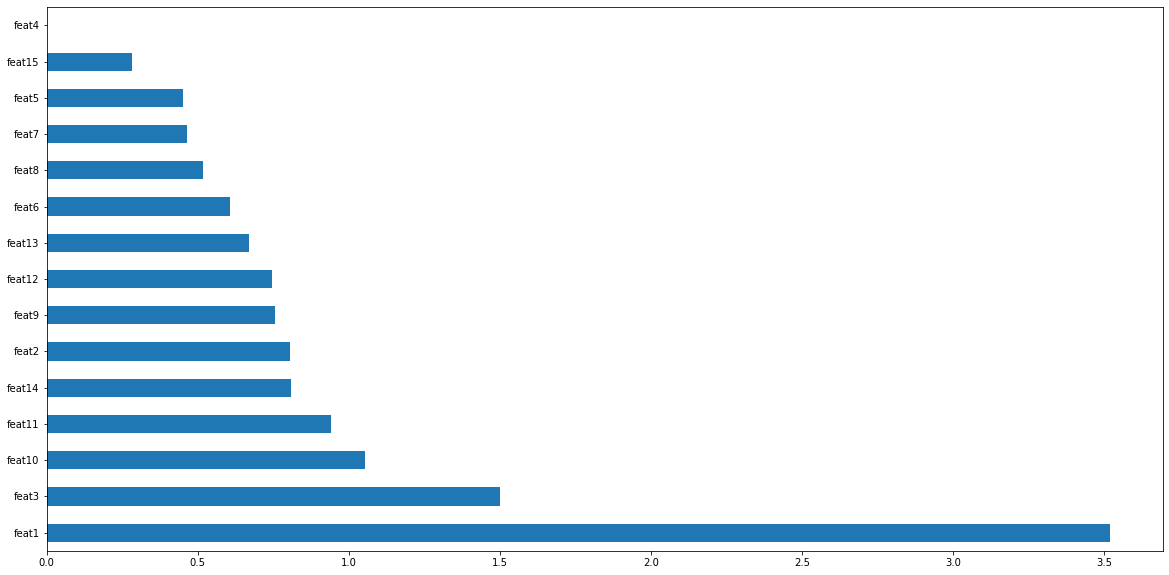

In [10]:
target = df['target']
features = df.drop('target', axis=1)

# determine the mutual information for classification 
# output a value between [0,1], the higher the value the more dependent on target values
mutual_info = mutual_info_regression(features, target)
# convert into series and get column names 
mutual_info = pd.Series(mutual_info)
mutual_info.index = features.columns

# plot ordered mutual_info values per feature 
mutual_info.sort_values(ascending=False).plot(kind='barh', figsize=(20,10))
print(mutual_info.index)

# feature importance is feat1 and feat3 using mutual_info_regression

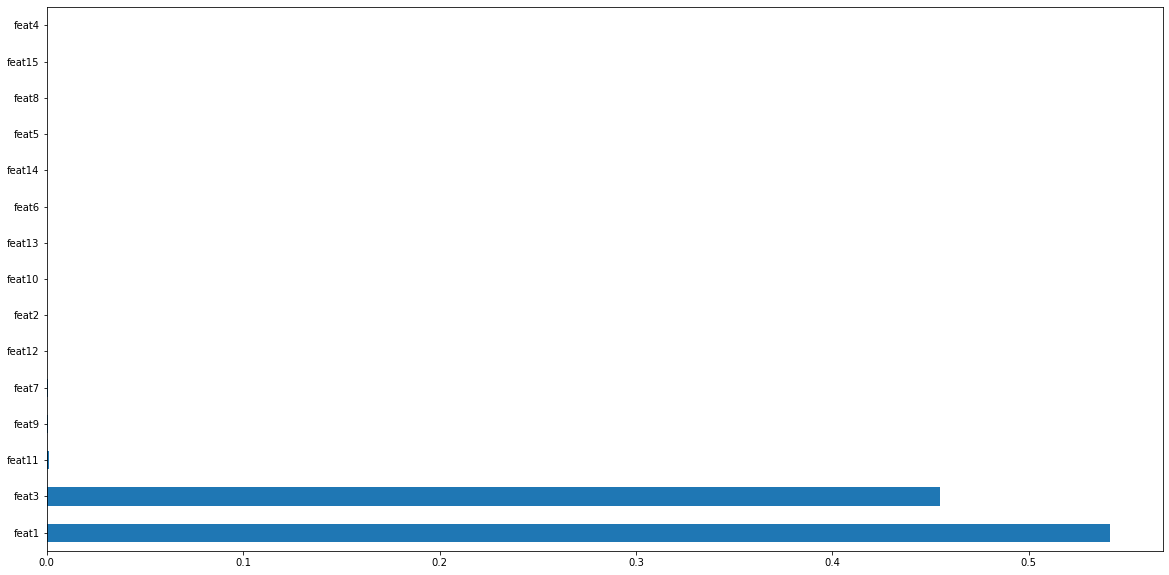

In [11]:
model = ExtraTreeRegressor()
model.fit(features, target)

# plot the feature importance
feat_importance = pd.Series(model.feature_importances_, index = features.columns)
feat_importance.nlargest(20).plot(kind='barh', figsize=(20,10))
plt.show()

# feature importance is feat1 and feat3 using ExtraTreeRegressor

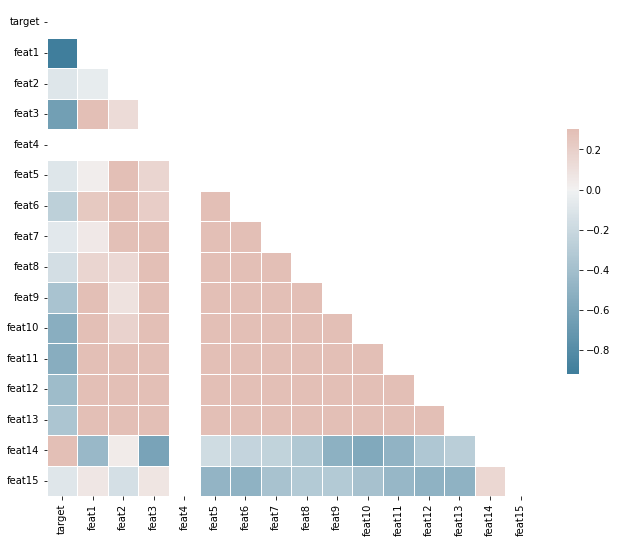

In [12]:
# plot correlation 
def pearson_corr(dataframe):
    corr = dataframe.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
pearson_corr(df)

# high correlation between feat1, feat3, feat 10, feat11

In [13]:
df = df[['target', 'feat1', 'feat3']]

<AxesSubplot:>

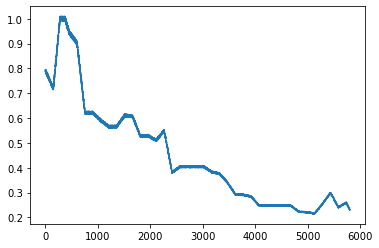

In [14]:
df.target.plot()


<AxesSubplot:>

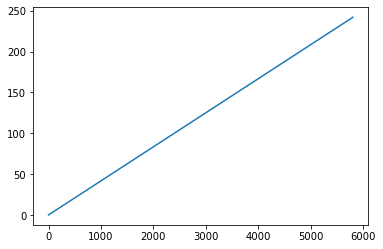

In [15]:
df.feat1.plot()

<AxesSubplot:>

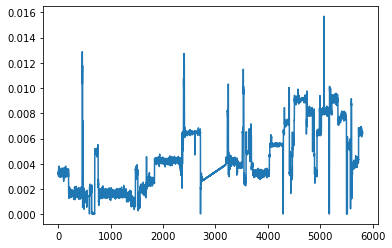

In [16]:
df.feat3.plot()

In [17]:
def adfuller_test(df, feature):
    result=adfuller(df[feature])
    if result[1] <= 0.05:
        print("p-value is less than .05 - time series is stationary")
    else:
        print("P-value is not less than .05 - time series is non-stationary")

In [25]:
for col in df.columns:
    adfuller_test(df, col)

P-value is not less than .05 - time series is non-stationary
P-value is not less than .05 - time series is non-stationary
p-value is less than .05 - time series is stationary


In [26]:
df1 = df.diff().dropna()
df1.head()

,target,feat1,feat3
1,0.00026,0.041667,0.000135
2,0.00749,0.041670,-0.000042
3,-0.00652,0.041660,0.000086
4,0.00456,0.041670,-0.000020
5,0.00049,0.041670,-0.000104


In [27]:
df1.isnull().sum()

target    0
feat1     0
feat3     0
dtype: int64

In [28]:
for col in df1.columns:
    adfuller_test(df, col)

P-value is not less than .05 - time series is non-stationary
P-value is not less than .05 - time series is non-stationary
p-value is less than .05 - time series is stationary


In [29]:
df.to_csv('../inputs/clean_data.csv', index=False)

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm


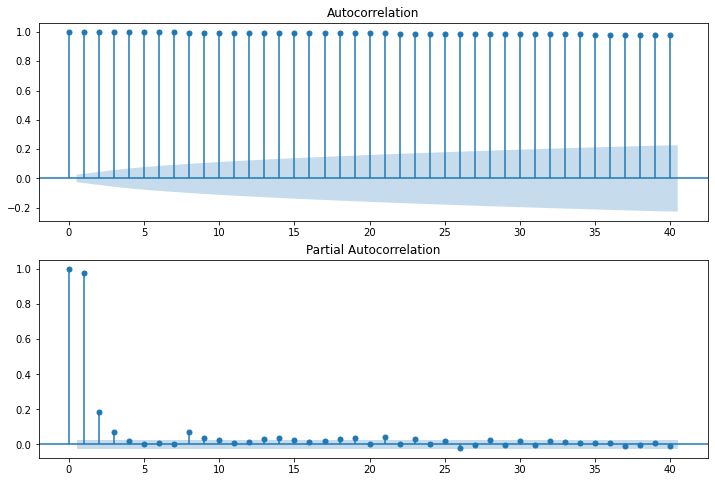

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.feat1.iloc[13:],lags=40,ax=ax1)

# Rather than giving the autocorrelations, it gives you the partial autocorrelation.
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.feat3.iloc[13:],lags=40,ax=ax2)